# Project Title : loan approval prediction using Machine Learning 
## Quantitative
## A quantitative variable is a variable that reflects a notion of magnitude, that is, if the values it can take are numbers. A quantitative variable represents thus a measure and is numerical.

## Quantitative variables are divided into two types: discrete and continuous. The difference is explained in the following two sections.

## Discrete
## Quantitative discrete variables are variables for which the values it can take are countable and have a finite number of possibilities. The values are often (but not always) integers. Here are some examples of discrete variables:

## Continuous
## On the other hand, quantitative continuous variables are variables for which the values are not countable and have an infinite number of possibilities. For example: Age,Weight,Height  

## Qualitative
## In opposition to quantitative variables, qualitative variables (also referred as categorical variables or factors in R) are variables that are not numerical and which values fits into categories.

## In other words, a qualitative variable is a variable which takes as its values modalities, categories or even levels, in contrast to quantitative variables which measure a quantity on each individual.

## Qualitative variables are divided into two types: nominal and ordinal.
## Nominal
## A qualitative nominal variable is a qualitative variable where no ordering is possible or implied in the levels.

## For example, the variable gender is nominal because there is no order in the levels (no matter how many levels you consider for the gender—only two with female/male, or more than two with female/male/ungendered/others, levels are unordered). Eye color is another example of a nominal variable because there is no order among blue, brown or green eyes.

## Ordinal
## On the other hand, a qualitative ordinal variable is a qualitative variable with an order implied in the levels. For instance, if the severity of road accidents has been measured on a scale such as light, moderate and fatal accidents, this variable is a qualitative ordinal variable because there is a clear order in the levels.

## Another good example is health, which can take values such as poor, reasonable, good, or excellent. Again, there is a clear order in these levels so health is in this case a qualitative ordinal variable

## Nominal : 
1. Loan_ID
2. Gender
3. Married
4. Self_Employed
5. Loan_Status
## Ordinal :
6. Education
7. Property_Area

## DISCRETE: 
8. Dependents
9. ApplicantIncome
10. Loan_Amount_Term
11. Credit_History

## Continuoue
12. CoapplicantIncome
13. LoanAmount

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
import xgboost as xgb

In [14]:
df=pd.read_csv('train_loan_approval.csv')

In [15]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [16]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [18]:
df.shape

(614, 13)

In [19]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [20]:
mod_val=df['Gender'].mode()[0]


In [21]:
mod_val

'Male'

In [22]:
df['Gender'].fillna(mod_val,inplace=True)

In [23]:
df['Gender']

0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
609    Female
610      Male
611      Male
612      Male
613    Female
Name: Gender, Length: 614, dtype: object

In [24]:
mod_val=df['Dependents'].mode()[0]


In [25]:
df['Dependents'].fillna(mod_val,inplace=True)

In [26]:
mod_val=df['Married'].mode()[0]


In [27]:
df['Married']=df['Married'].fillna(mod_val)

In [28]:
mod_val=df['Self_Employed'].mode()[0]



In [29]:
df['Self_Employed']=df['Self_Employed'].fillna(mod_val)

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

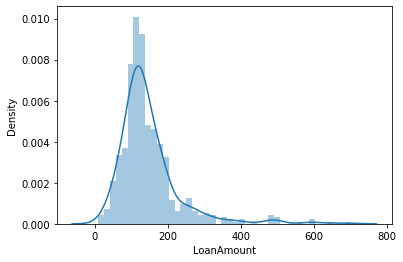

In [30]:
sns.distplot(df['LoanAmount'])


In [31]:
med_val=df['LoanAmount'].median()


In [32]:
df['LoanAmount']=df['LoanAmount'].fillna(med_val)

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

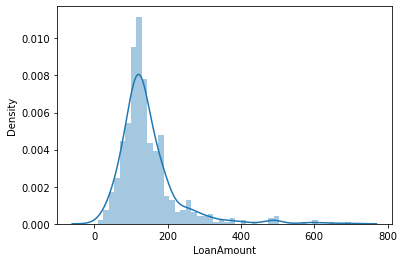

In [33]:
sns.distplot(df['LoanAmount'])


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

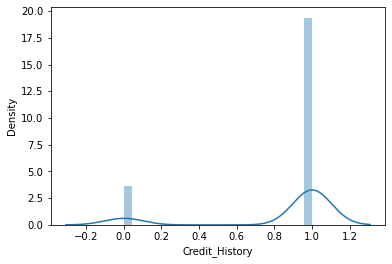

In [34]:
sns.distplot(df['Credit_History'])

In [35]:
med_val=df['Credit_History'].median()


In [36]:
df['Credit_History']=df['Credit_History'].fillna(med_val)

In [37]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

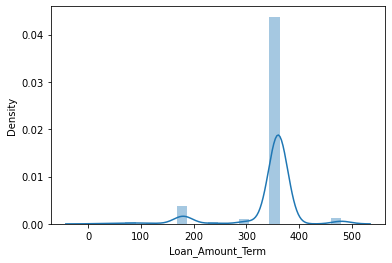

In [38]:
sns.distplot(df['Loan_Amount_Term'])

In [39]:
med_va=df['Loan_Amount_Term'].median()


In [40]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(med_val)

In [41]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

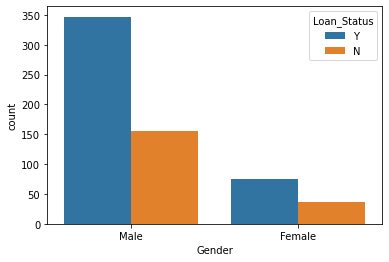

In [42]:
sns.countplot(x=df['Gender'],hue=df['Loan_Status'])

In [43]:
label_df=df.groupby(['Gender','Loan_Status']).size().sort_values(ascending=False).index


In [44]:
val_df=df.groupby(['Gender','Loan_Status']).size().sort_values(ascending=False).values


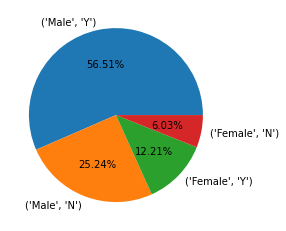

In [45]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='Married', ylabel='count'>

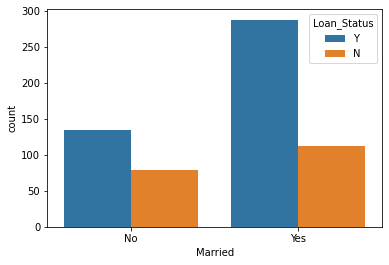

In [46]:
sns.countplot(x=df['Married'],hue=df['Loan_Status'])

In [47]:
label_df=df.groupby(['Married','Loan_Status']).size().sort_values(ascending=False).index


In [48]:
val_df=df.groupby(['Married','Loan_Status']).size().sort_values(ascending=False).values


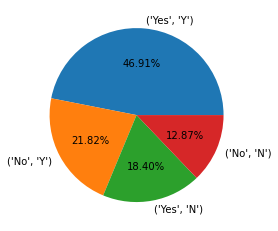

In [49]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='Dependents', ylabel='count'>

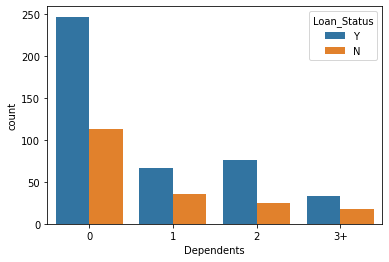

In [50]:
sns.countplot(x=df['Dependents'],hue=df['Loan_Status'])

In [51]:
label_df=df.groupby(['Dependents','Loan_Status']).size().sort_values(ascending=False).index


In [52]:
val_df=df.groupby(['Dependents','Loan_Status']).size().sort_values(ascending=False).values


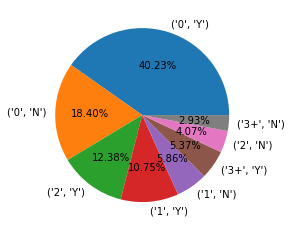

In [53]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

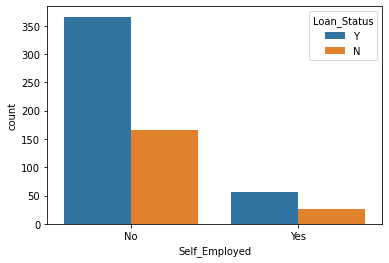

In [54]:
sns.countplot(x=df['Self_Employed'],hue=df['Loan_Status'])

In [55]:
label_df=df.groupby(['Self_Employed','Loan_Status']).size().sort_values(ascending=False).index


In [56]:
val_df=df.groupby(['Self_Employed','Loan_Status']).size().sort_values(ascending=False).values


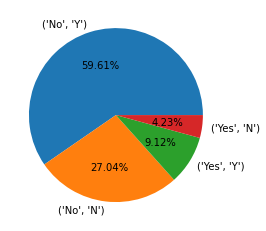

In [57]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

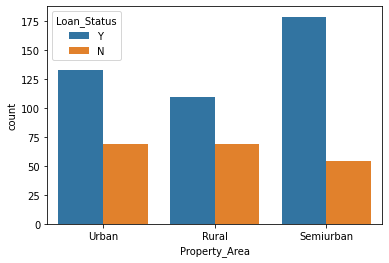

In [58]:
sns.countplot(x=df['Property_Area'],hue=df['Loan_Status'])

In [59]:
label_df=df.groupby(['Property_Area','Loan_Status']).size().sort_values(ascending=False).index


In [60]:
val_df=df.groupby(['Property_Area','Loan_Status']).size().sort_values(ascending=False).values


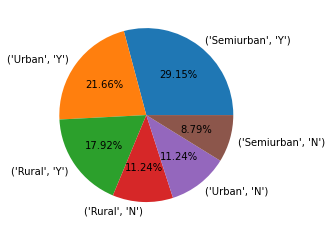

In [61]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='Education', ylabel='count'>

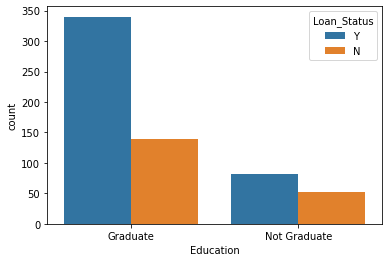

In [62]:
sns.countplot(x=df['Education'],hue=df['Loan_Status'])

In [63]:
label_df=df.groupby(['Education','Loan_Status']).size().sort_values(ascending=False).index


In [64]:
val_df=df.groupby(['Education','Loan_Status']).size().sort_values(ascending=False).values


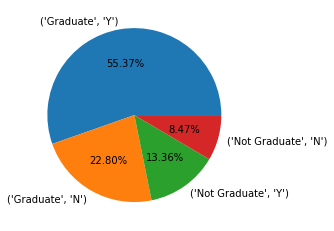

In [65]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

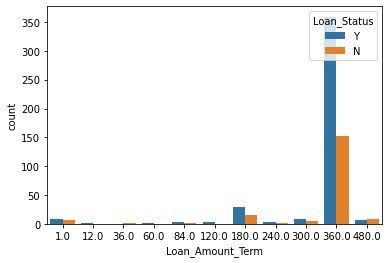

In [66]:
sns.countplot(x=df['Loan_Amount_Term'],hue=df['Loan_Status'])
plt.show()

In [67]:
label_df=df.groupby(['Loan_Amount_Term','Loan_Status']).size().sort_values(ascending=False).index


In [68]:
val_df=df.groupby(['Loan_Amount_Term','Loan_Status']).size().sort_values(ascending=False).values


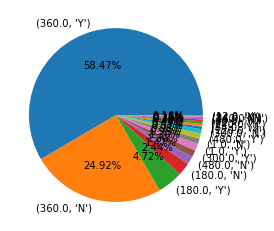

In [69]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [70]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


<AxesSubplot:xlabel='Gender', ylabel='LoanAmount'>

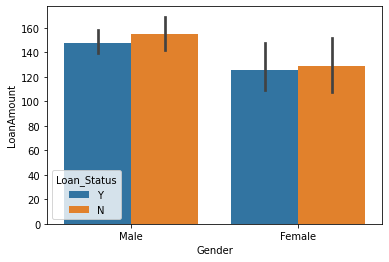

In [71]:
sns.barplot(x=df['Gender'],y=df['LoanAmount'],hue=df['Loan_Status'])

In [72]:
label_df=df.groupby(['Gender','Loan_Status'])['LoanAmount'].mean().sort_values(ascending=False).index


In [73]:
val_df=df.groupby(['Gender','Loan_Status'])['LoanAmount'].mean().sort_values(ascending=False).values


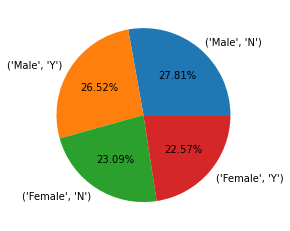

In [74]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='Married', ylabel='LoanAmount'>

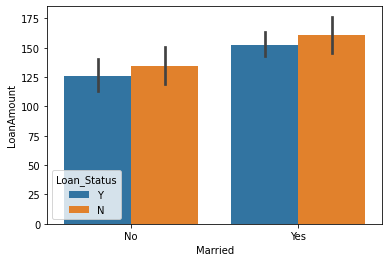

In [75]:
sns.barplot(x=df['Married'],y=df['LoanAmount'],hue=df['Loan_Status'])

In [76]:
label_df=df.groupby(['Married','Loan_Status'])['LoanAmount'].mean().sort_values(ascending=False).index


In [77]:
val_df=df.groupby(['Married','Loan_Status'])['LoanAmount'].mean().sort_values(ascending=False).values


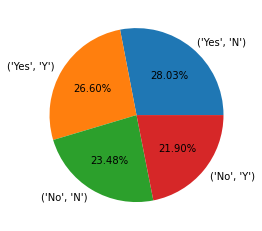

In [78]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='Dependents', ylabel='LoanAmount'>

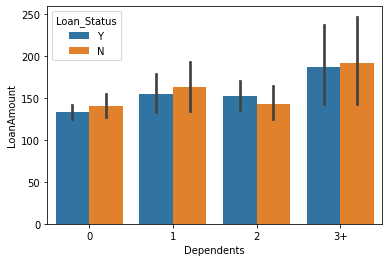

In [79]:
sns.barplot(x=df['Dependents'],y=df['LoanAmount'],hue=df['Loan_Status'])

In [80]:
label_df=df.groupby(['Dependents','Loan_Status'])['LoanAmount'].mean().sort_values(ascending=False).index


In [81]:
val_df=df.groupby(['Dependents','Loan_Status'])['LoanAmount'].mean().sort_values(ascending=False).values


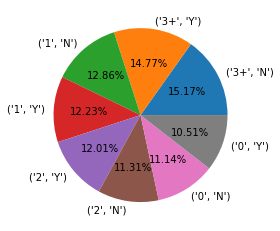

In [82]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='Education', ylabel='LoanAmount'>

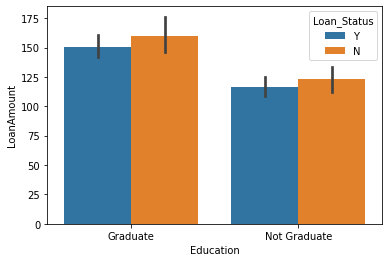

In [83]:
sns.barplot(x=df['Education'],y=df['LoanAmount'],hue=df['Loan_Status'])

In [84]:
label_df=df.groupby(['Education','Loan_Status'])['LoanAmount'].mean().sort_values(ascending=False).index


In [85]:
val_df=df.groupby(['Education','Loan_Status'])['LoanAmount'].mean().sort_values(ascending=False).values


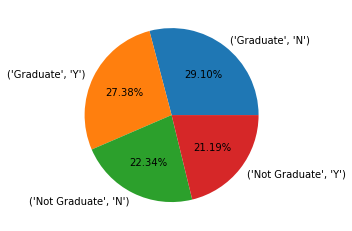

In [86]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='Self_Employed', ylabel='LoanAmount'>

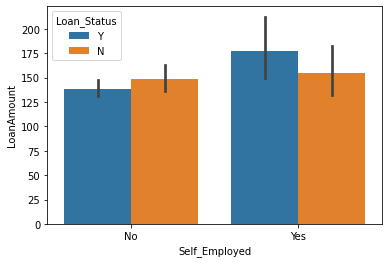

In [87]:
sns.barplot(x=df['Self_Employed'],y=df['LoanAmount'],hue=df['Loan_Status'])

In [88]:
label_df=df.groupby(['Self_Employed','Loan_Status'])['LoanAmount'].mean().sort_values(ascending=False).index


In [89]:
val_df=df.groupby(['Self_Employed','Loan_Status'])['LoanAmount'].mean().sort_values(ascending=False).values


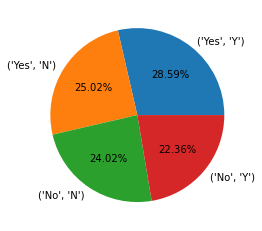

In [90]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='Property_Area', ylabel='LoanAmount'>

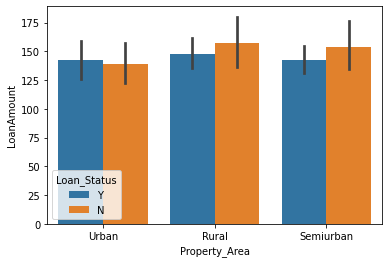

In [91]:
sns.barplot(x=df['Property_Area'],y=df['LoanAmount'],hue=df['Loan_Status'])

In [92]:
label_df=df.groupby(['Property_Area','Loan_Status'])['LoanAmount'].mean().sort_values(ascending=False).index


In [93]:
val_df=df.groupby(['Property_Area','Loan_Status'])['LoanAmount'].mean().sort_values(ascending=False).values


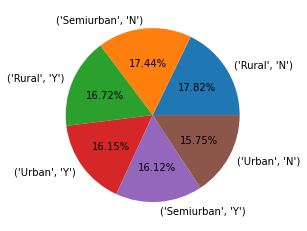

In [94]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='Credit_History', ylabel='LoanAmount'>

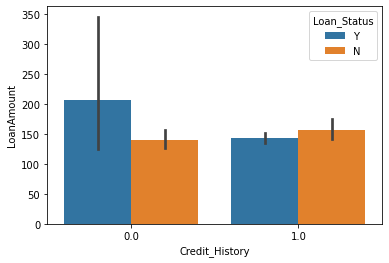

In [95]:
sns.barplot(x=df['Credit_History'],y=df['LoanAmount'],hue=df['Loan_Status'])

In [96]:
label_df=df.groupby(['Credit_History','Loan_Status'])['LoanAmount'].mean().sort_values(ascending=False).index


In [97]:
val_df=df.groupby(['Credit_History','Loan_Status'])['LoanAmount'].mean().sort_values(ascending=False).values


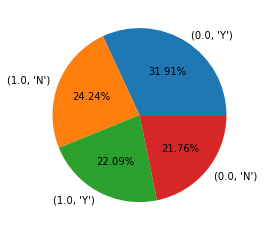

In [98]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='ApplicantIncome'>

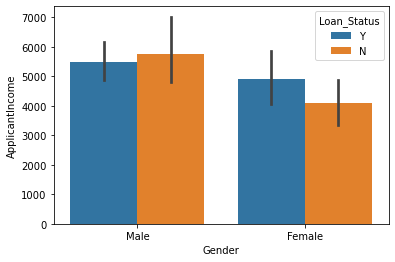

In [99]:
sns.barplot(x=df['Gender'],y=df['ApplicantIncome'],hue=df['Loan_Status'])

In [100]:
label_df=df.groupby(['Gender','Loan_Status'])['ApplicantIncome'].mean().sort_values(ascending=False).index


In [101]:
val_df=df.groupby(['Gender','Loan_Status'])['ApplicantIncome'].mean().sort_values(ascending=False).values


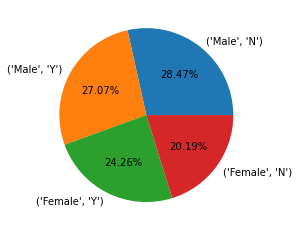

In [102]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='Property_Area', ylabel='ApplicantIncome'>

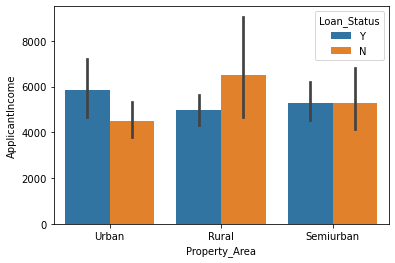

In [103]:
sns.barplot(x=df['Property_Area'],y=df['ApplicantIncome'],hue=df['Loan_Status'])

In [104]:
label_df=df.groupby(['Property_Area','Loan_Status'])['ApplicantIncome'].mean().sort_values(ascending=False).index


In [105]:
val_df=df.groupby(['Property_Area','Loan_Status'])['ApplicantIncome'].mean().sort_values(ascending=False).values


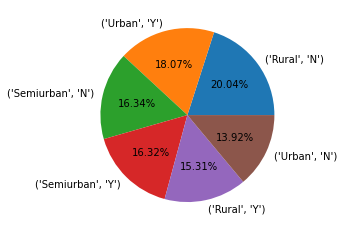

In [106]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='Credit_History', ylabel='ApplicantIncome'>

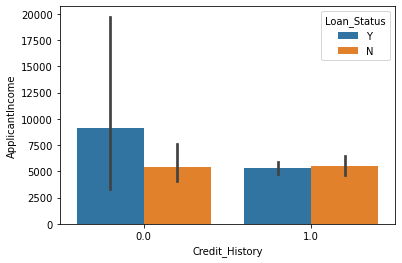

In [107]:
sns.barplot(x=df['Credit_History'],y=df['ApplicantIncome'],hue=df['Loan_Status'])

In [108]:
label_df=df.groupby(['Credit_History','Loan_Status'])['ApplicantIncome'].mean().sort_values(ascending=False).index


In [109]:
val_df=df.groupby(['Credit_History','Loan_Status'])['ApplicantIncome'].mean().sort_values(ascending=False).values


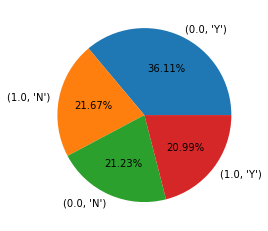

In [110]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='Self_Employed', ylabel='ApplicantIncome'>

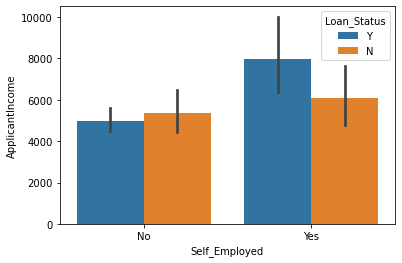

In [111]:
sns.barplot(x=df['Self_Employed'],y=df['ApplicantIncome'],hue=df['Loan_Status'])

In [112]:
label_df=df.groupby(['Self_Employed','Loan_Status'])['ApplicantIncome'].mean().sort_values(ascending=False).index


In [113]:
val_df=df.groupby(['Self_Employed','Loan_Status'])['ApplicantIncome'].mean().sort_values(ascending=False).values


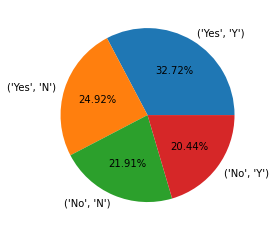

In [114]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='Education', ylabel='ApplicantIncome'>

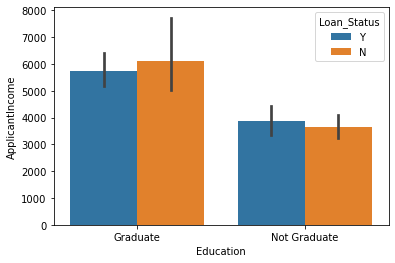

In [115]:
sns.barplot(x=df['Education'],y=df['ApplicantIncome'],hue=df['Loan_Status'])

In [116]:
label_df=df.groupby(['Education','Loan_Status'])['ApplicantIncome'].mean().sort_values(ascending=False).index


In [117]:
val_df=df.groupby(['Education','Loan_Status'])['ApplicantIncome'].mean().sort_values(ascending=False).values


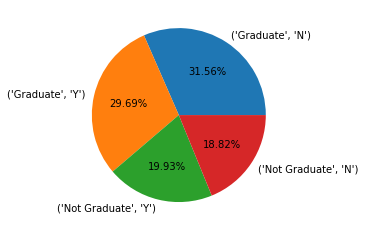

In [118]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='Dependents', ylabel='ApplicantIncome'>

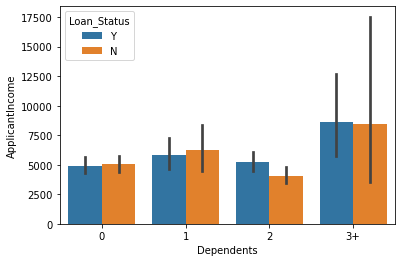

In [119]:
sns.barplot(x=df['Dependents'],y=df['ApplicantIncome'],hue=df['Loan_Status'])

In [120]:
label_df=df.groupby(['Dependents','Loan_Status'])['ApplicantIncome'].mean().sort_values(ascending=False).index


In [121]:
val_df=df.groupby(['Dependents','Loan_Status'])['ApplicantIncome'].mean().sort_values(ascending=False).values


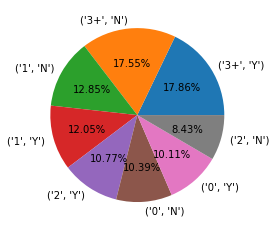

In [122]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='Married', ylabel='ApplicantIncome'>

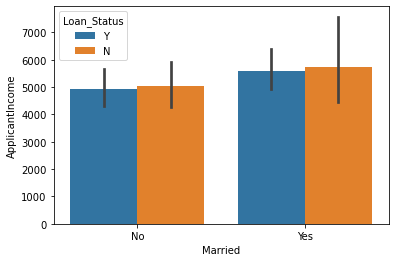

In [123]:
sns.barplot(x=df['Married'],y=df['ApplicantIncome'],hue=df['Loan_Status'])

In [124]:
label_df=df.groupby(['Married','Loan_Status'])['ApplicantIncome'].mean().sort_values(ascending=False).index


In [125]:
val_df=df.groupby(['Married','Loan_Status'])['ApplicantIncome'].mean().sort_values(ascending=False).values


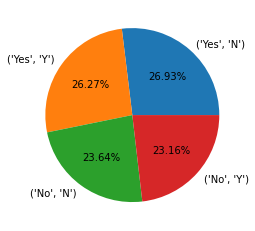

In [126]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [127]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


<AxesSubplot:xlabel='Education', ylabel='LoanAmount'>

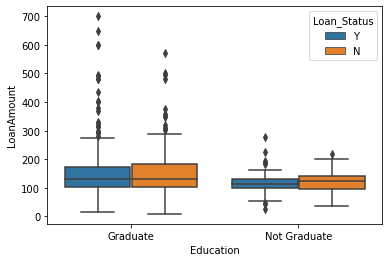

In [128]:
sns.boxplot(x=df['Education'],y=df['LoanAmount'],hue=df['Loan_Status'])

<AxesSubplot:xlabel='Married', ylabel='LoanAmount'>

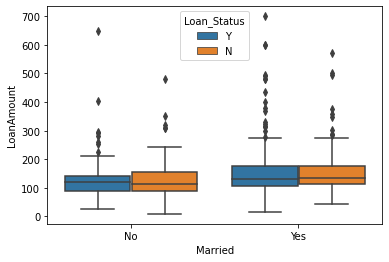

In [129]:
sns.boxplot(x=df['Married'],y=df['LoanAmount'],hue=df['Loan_Status'])

<AxesSubplot:xlabel='Self_Employed', ylabel='LoanAmount'>

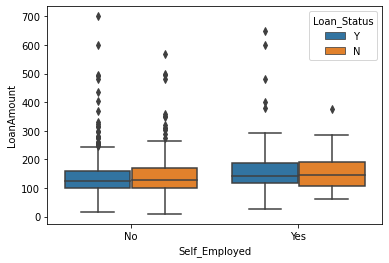

In [130]:
sns.boxplot(x=df['Self_Employed'],y=df['LoanAmount'],hue=df['Loan_Status'])

<AxesSubplot:xlabel='Property_Area', ylabel='LoanAmount'>

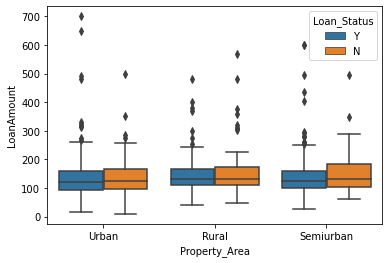

In [131]:
sns.boxplot(x=df['Property_Area'],y=df['LoanAmount'],hue=df['Loan_Status'])

In [132]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [133]:
label_df=df.groupby(['Gender','Married','Loan_Status'])['LoanAmount'].mean().sort_values(ascending=False).index


In [134]:
val_df=df.groupby(['Gender','Married','Loan_Status'])['LoanAmount'].mean().sort_values(ascending=False).values


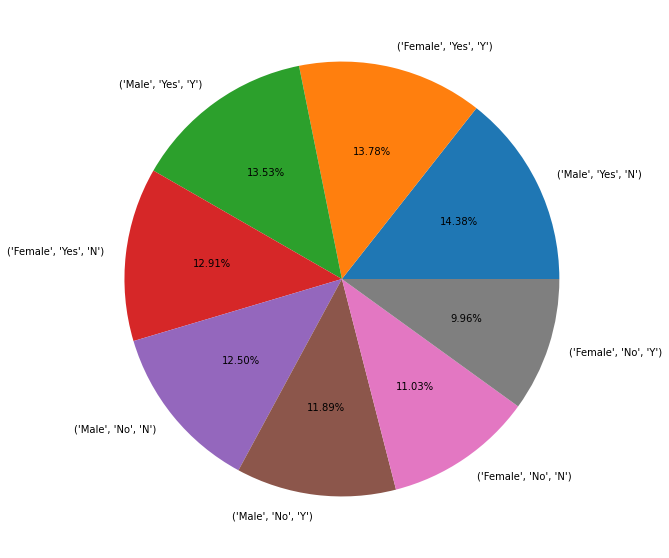

In [135]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [136]:
label_df=df.groupby(['Gender','Education','Loan_Status'])['LoanAmount'].mean().sort_values(ascending=False).index


In [137]:
val_df=df.groupby(['Gender','Education','Loan_Status'])['LoanAmount'].mean().sort_values(ascending=False).values


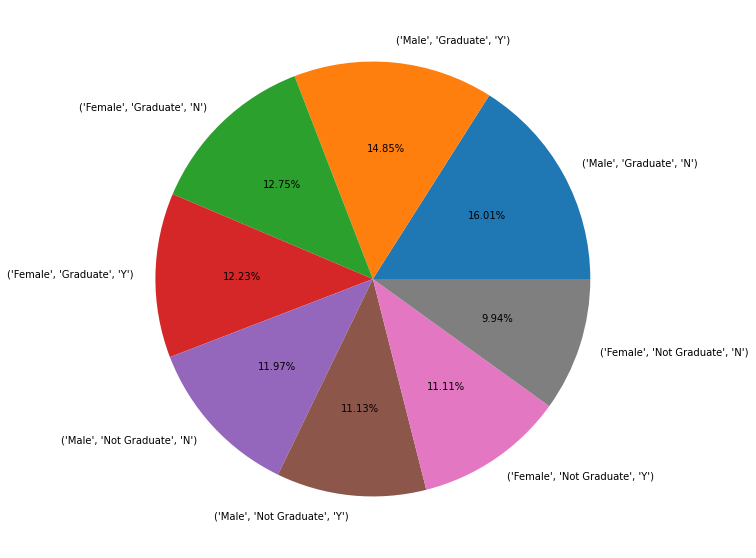

In [138]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [139]:
label_df=df.groupby(['Loan_Status','Married','Education'])['LoanAmount'].mean().sort_values(ascending=False).index


In [140]:
val_df=df.groupby(['Loan_Status','Married','Education'])['LoanAmount'].mean().sort_values(ascending=False).values


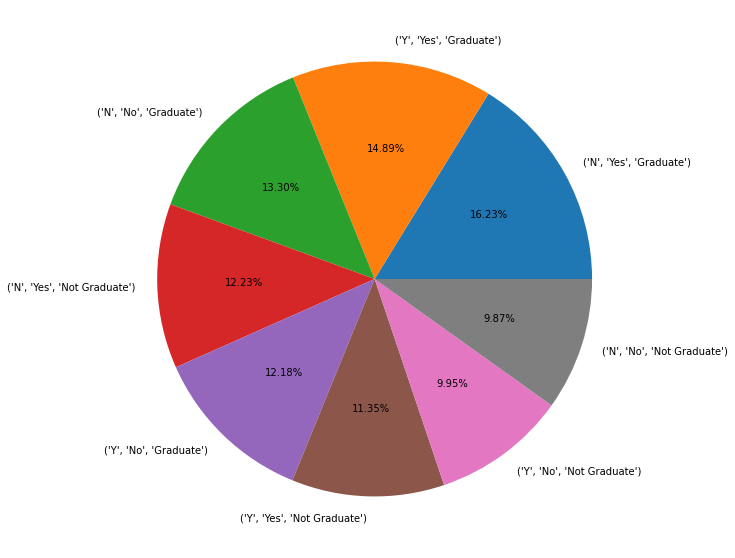

In [141]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [142]:
label_df=df.groupby(['Gender','Property_Area','Loan_Status'])['LoanAmount'].mean().sort_values(ascending=False).index


In [143]:
val_df=df.groupby(['Gender','Property_Area','Loan_Status'])['LoanAmount'].mean().sort_values(ascending=False).values


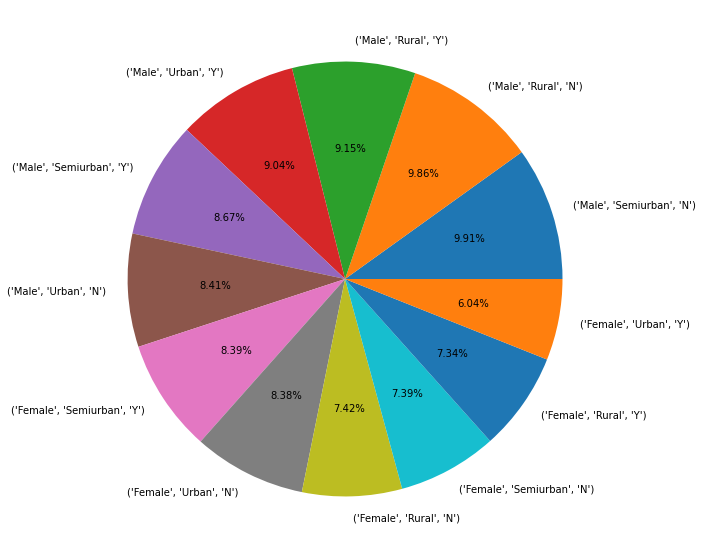

In [144]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [145]:
label_df=df.groupby(['Gender','Loan_Status','Property_Area'])['LoanAmount'].mean().sort_values(ascending=False).index


In [146]:
val_df=df.groupby(['Gender','Loan_Status','Property_Area'])['LoanAmount'].mean().sort_values(ascending=False).values


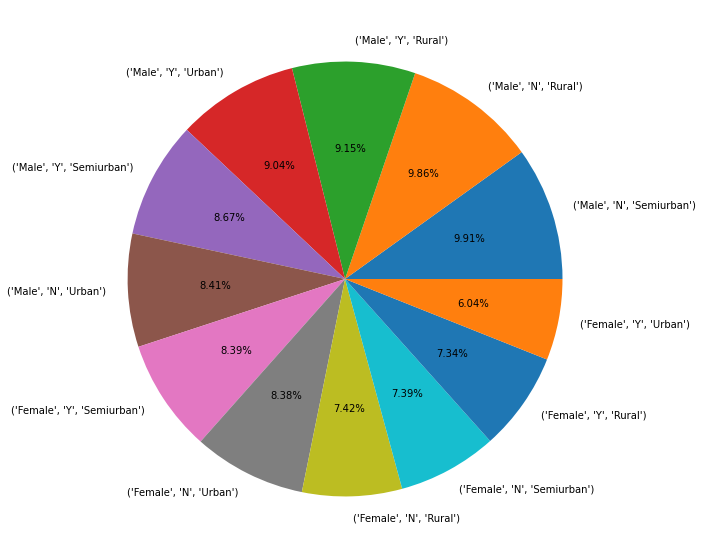

In [147]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [148]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [149]:
label_df=df.groupby(['Gender','Dependents','Self_Employed','Loan_Status'])['LoanAmount'].mean().sort_values(ascending=False).index


In [150]:
val_df=df.groupby(['Gender','Dependents','Self_Employed','Loan_Status'])['LoanAmount'].mean().sort_values(ascending=False).values


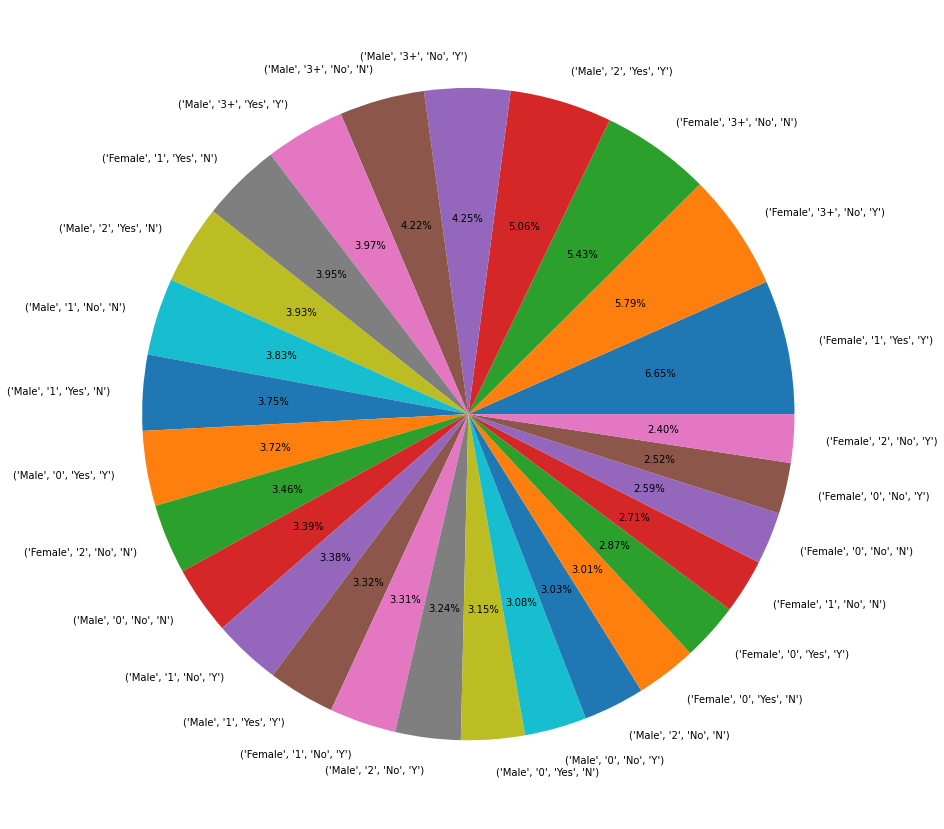

In [151]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [152]:
label_df=df.groupby(['Loan_Status','Dependents','Education','Married'])['LoanAmount'].mean().sort_values(ascending=False).index


In [153]:
val_df=df.groupby(['Loan_Status','Dependents','Education','Married'])['LoanAmount'].mean().sort_values(ascending=False).values


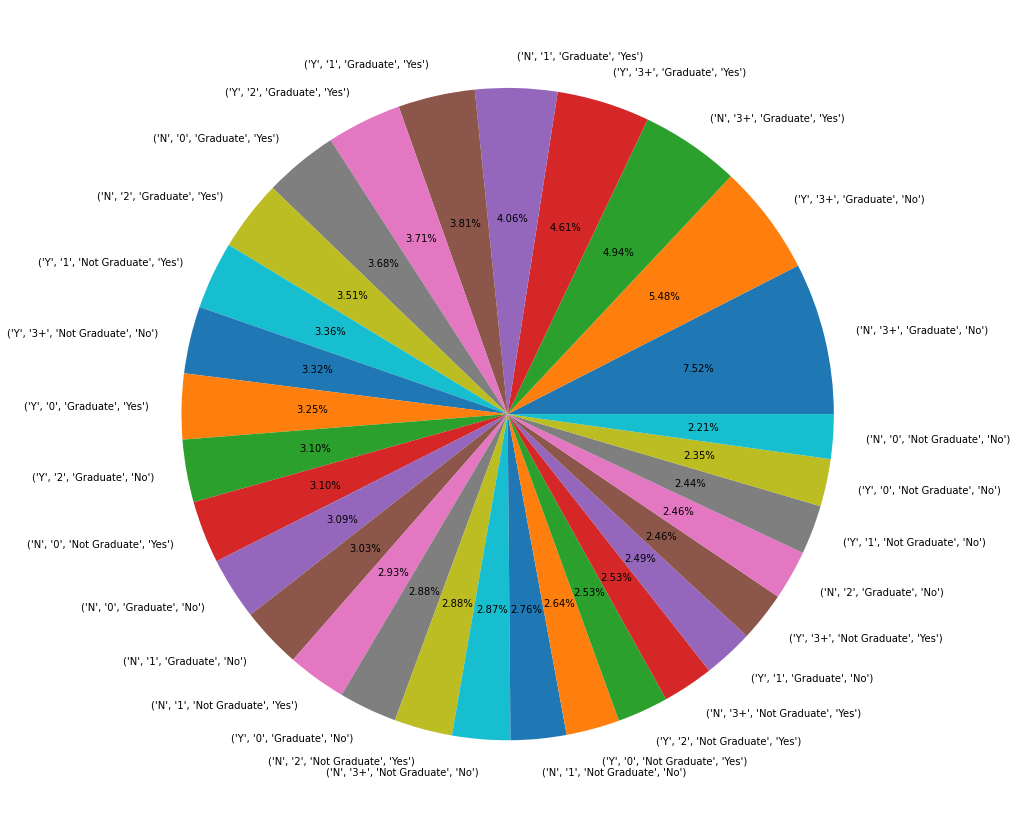

In [154]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [155]:
label_df=df.groupby(['Loan_Status','Property_Area'])['LoanAmount'].mean().sort_values(ascending=False).index


In [156]:
val_df=df.groupby(['Loan_Status','Property_Area'])['LoanAmount'].mean().sort_values(ascending=False).values


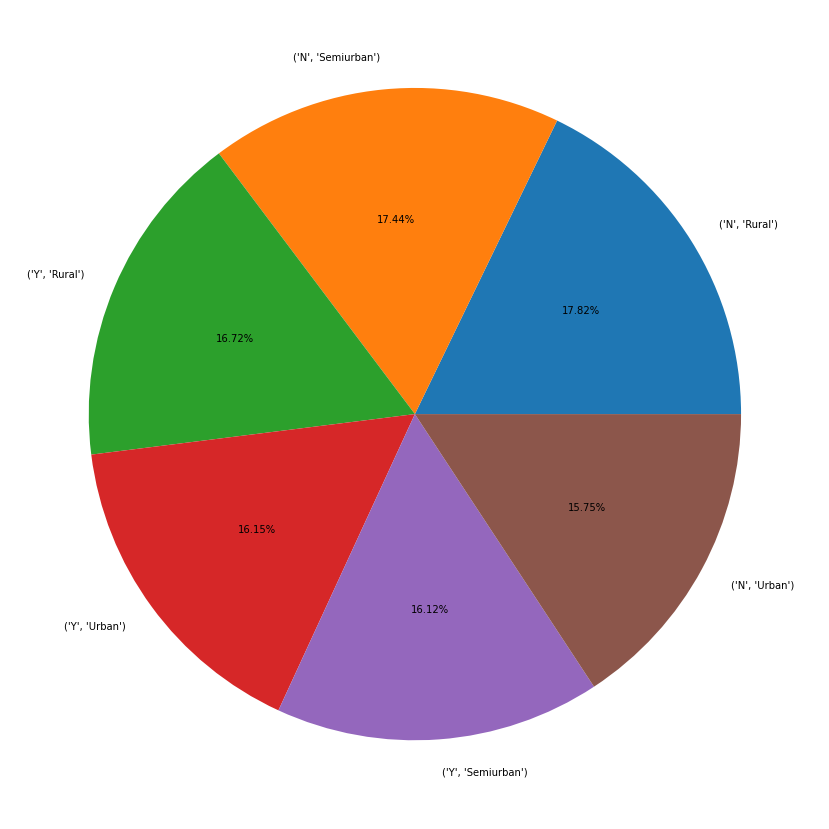

In [157]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [158]:
label_df=df.groupby(['Gender','Loan_Status'])['LoanAmount'].mean().sort_values(ascending=False).index


In [159]:
val_df=df.groupby(['Gender','Loan_Status'])['LoanAmount'].mean().sort_values(ascending=False).values


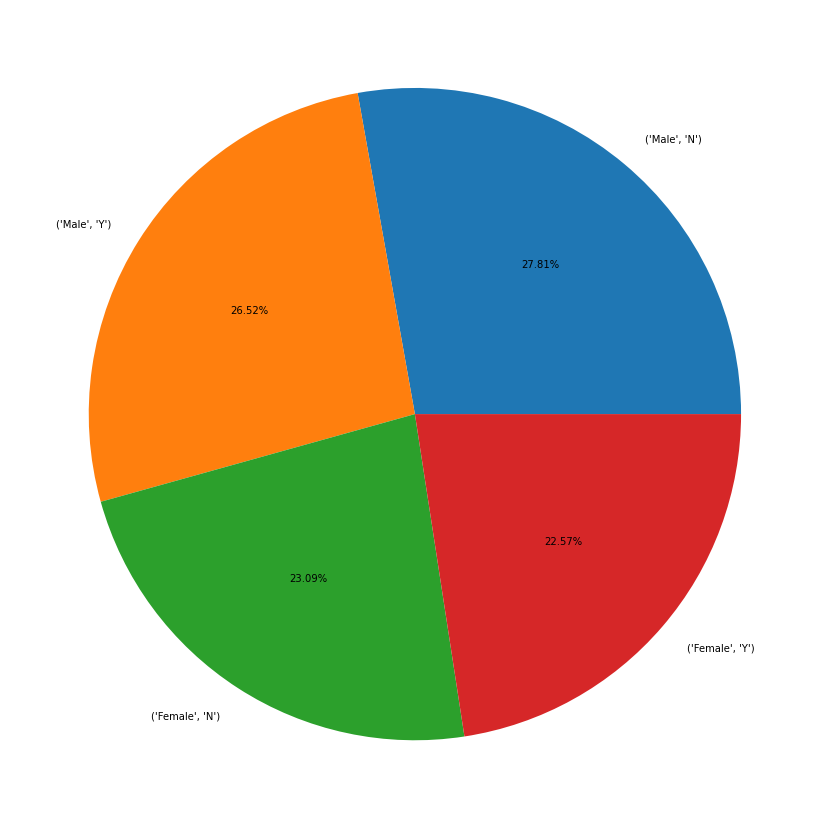

In [160]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [161]:
label_df=df.groupby(['Loan_Status','Dependents','Property_Area','Married'])['LoanAmount'].mean().sort_values(ascending=False).index


In [162]:
val_df=df.groupby(['Loan_Status','Dependents','Property_Area','Married'])['LoanAmount'].mean().sort_values(ascending=False).values


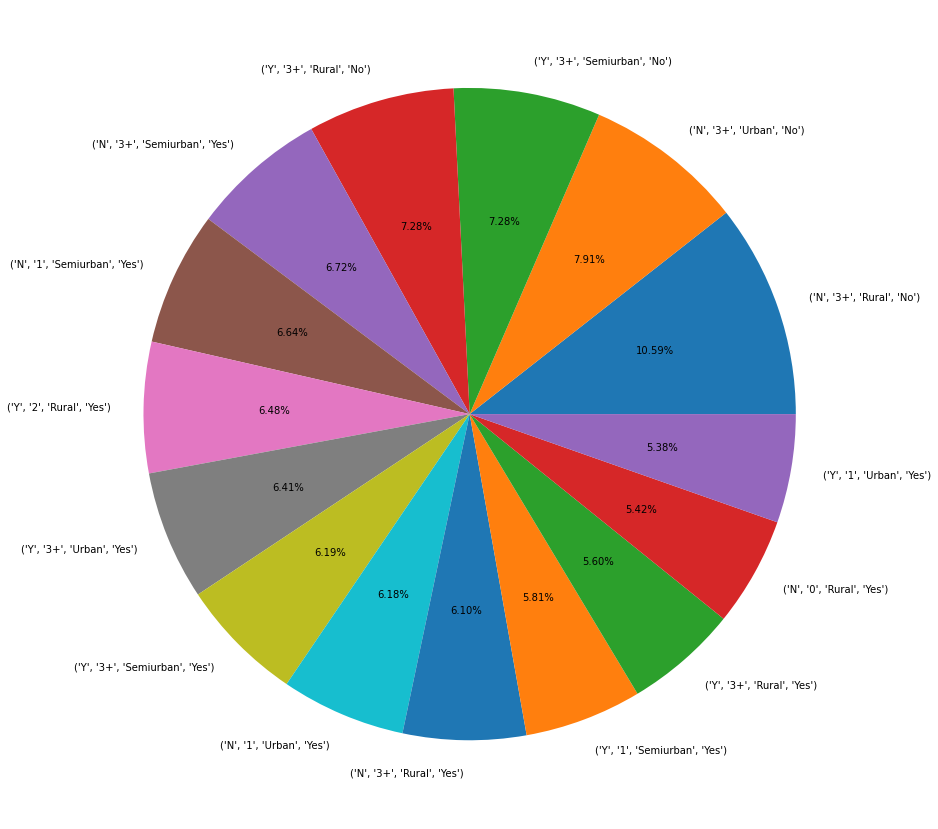

In [163]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df[:15],labels=label_df[:15],autopct="%1.2f%%")
plt.show()

In [164]:
label_df=df.groupby(['Gender','Dependents','Loan_Status'])['LoanAmount'].mean().sort_values(ascending=False).index


In [165]:
val_df=df.groupby(['Gender','Dependents','Loan_Status'])['LoanAmount'].mean().sort_values(ascending=False).values


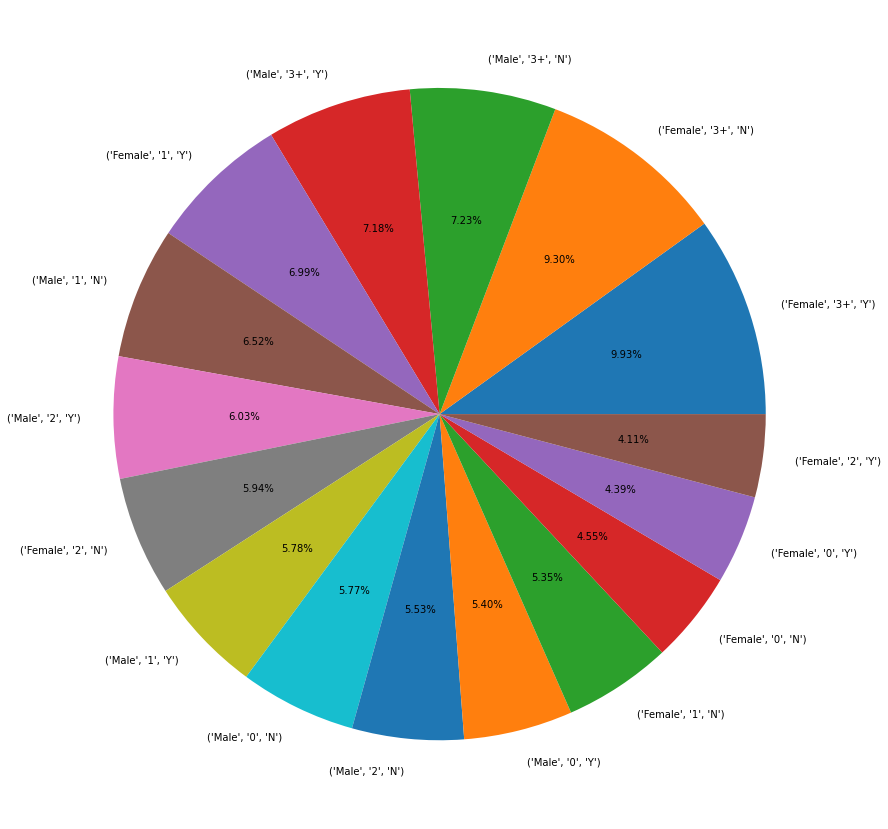

In [166]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [167]:
label_df=df.groupby(['Gender','Loan_Amount_Term','Loan_Status'])['LoanAmount'].mean().sort_values(ascending=False).index


In [168]:
val_df=df.groupby(['Gender','Loan_Amount_Term','Loan_Status'])['LoanAmount'].mean().sort_values(ascending=False).values


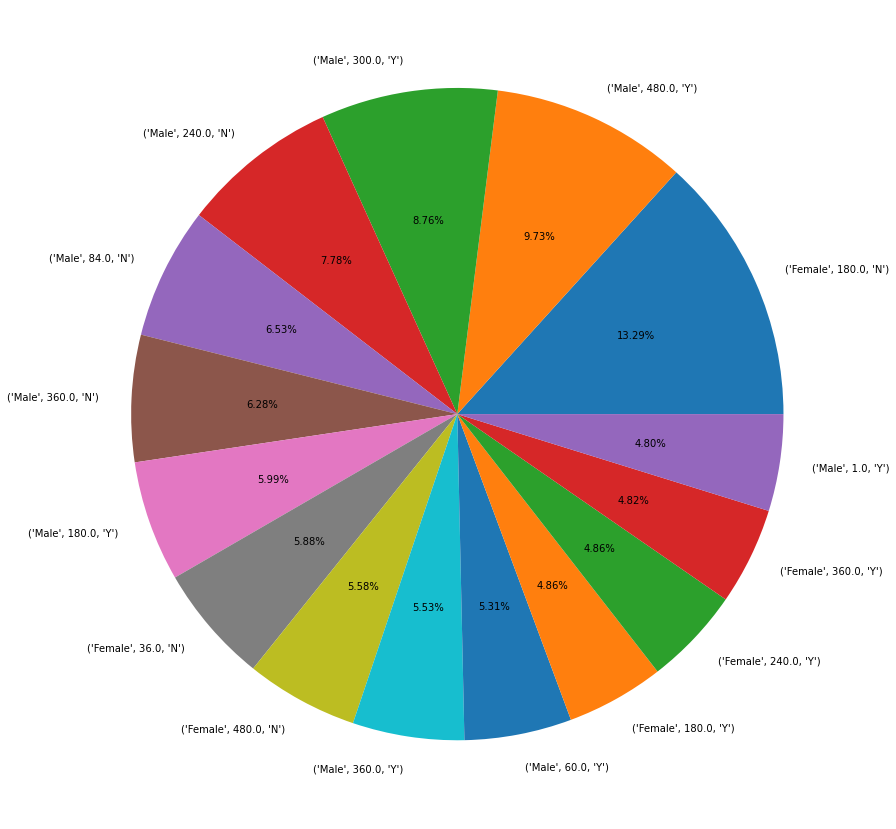

In [169]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df[:15],labels=label_df[:15],autopct="%1.2f%%")
plt.show()

In [170]:
label_df=df.groupby(['Loan_Status','Dependents','Loan_Amount_Term','Married'])['LoanAmount'].mean().sort_values(ascending=False).index


In [171]:
val_df=df.groupby(['Loan_Status','Dependents','Loan_Amount_Term','Married'])['LoanAmount'].mean().sort_values(ascending=False).values


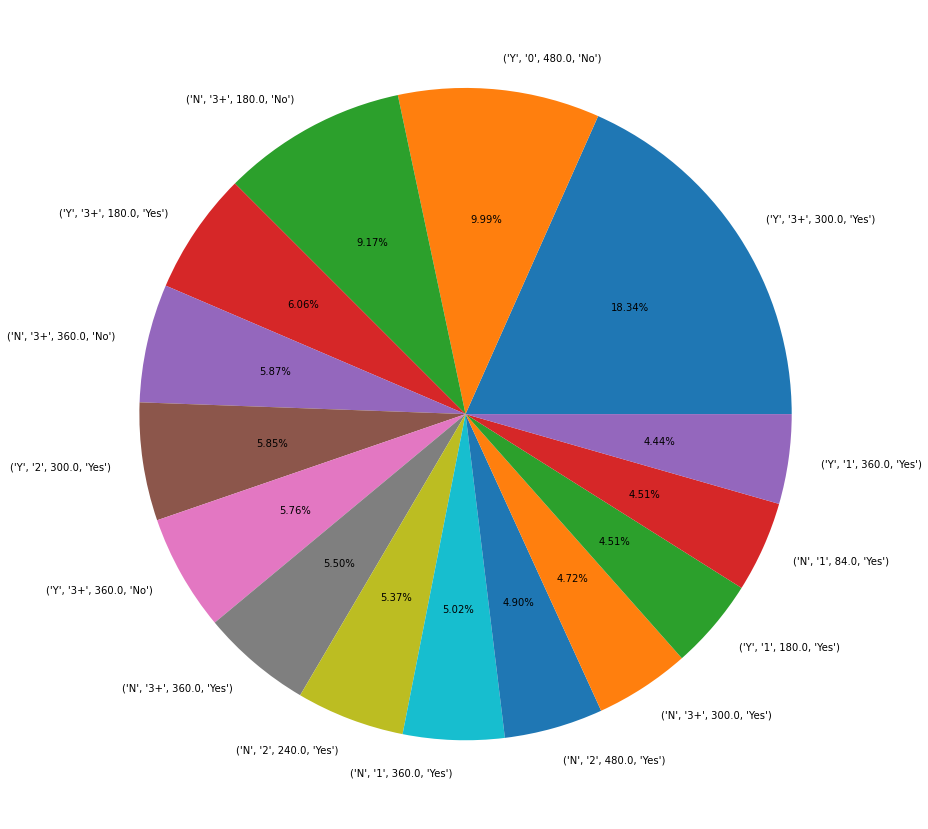

In [172]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df[:15],labels=label_df[:15],autopct="%1.2f%%")
plt.show()

In [173]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


<AxesSubplot:>

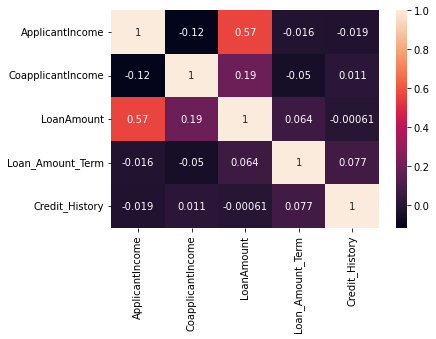

In [174]:
sns.heatmap(df.corr(),annot=True)


In [175]:
le=LabelEncoder()


In [176]:
df['Gender']=le.fit_transform(df['Gender'])

In [177]:
df['Married']=le.fit_transform(df['Married'])

In [178]:
df['Education']=le.fit_transform(df['Education'])

In [179]:
df['Self_Employed']=le.fit_transform(df['Self_Employed'])

In [180]:
df['Property_Area']=le.fit_transform(df['Property_Area'])

In [181]:
df['Loan_Status']=le.fit_transform(df['Loan_Status'])

In [182]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,3+,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [183]:
def ConvertLoan_ID(val):
    val=str(val)
    val=val.split("LP00")[1]
    return float(val)
    

In [184]:
df['Loan_ID']=df['Loan_ID'].apply(ConvertLoan_ID)

In [185]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1002.0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1003.0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1005.0,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1006.0,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1008.0,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2978.0,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,2979.0,1,1,3+,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,2983.0,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,2984.0,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [186]:
def ConvertDependents(val):
    val=str(val)
    return int(val[0])

In [187]:
df['Dependents']=df['Dependents'].apply(ConvertDependents)

In [188]:
df['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [189]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1002.0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1003.0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1005.0,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1006.0,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1008.0,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2978.0,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,2979.0,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,2983.0,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,2984.0,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_ID'>

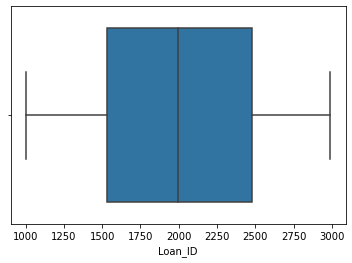

In [190]:
sns.boxplot(df['Loan_ID'])

In [191]:
sc=StandardScaler()


# Undersampling

In [192]:
count_class_0=df['Loan_Status'].value_counts()[0]


In [193]:
count_class_1=df['Loan_Status'].value_counts()[1]

In [194]:
count_class_1

422

In [195]:
count_class_0

192

In [196]:
df['Loan_Status'].value_counts()[0]

192

In [197]:
df_class_0=df[df['Loan_Status']==0]


In [198]:
df_class_1=df[df['Loan_Status']==1]


In [199]:
df_class_0.shape

(192, 13)

In [200]:
df_class_1.shape

(422, 13)

In [201]:
df_class_1_under=df_class_1.sample(count_class_0)

In [202]:
df_class_1_under

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
381,2229.0,1,0,0,0,0,5941,4232.0,296.0,360.0,1.0,1,1
362,2175.0,1,1,0,0,0,4750,2333.0,130.0,360.0,1.0,2,1
547,2772.0,1,0,0,0,0,2526,1783.0,145.0,360.0,1.0,0,1
425,2366.0,1,1,0,0,0,2666,4300.0,121.0,360.0,1.0,0,1
420,2348.0,1,1,0,0,0,5829,0.0,138.0,360.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,2983.0,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
240,1798.0,1,1,2,0,0,5819,5000.0,120.0,360.0,1.0,0,1
114,1398.0,1,0,0,0,0,5050,0.0,118.0,360.0,1.0,1,1
433,2387.0,1,1,0,0,0,2425,2340.0,143.0,360.0,1.0,1,1


In [203]:
df_test_under=pd.concat([df_class_1_under,df_class_0],axis=0)

In [204]:
df_test_under

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
381,2229.0,1,0,0,0,0,5941,4232.0,296.0,360.0,1.0,1,1
362,2175.0,1,1,0,0,0,4750,2333.0,130.0,360.0,1.0,2,1
547,2772.0,1,0,0,0,0,2526,1783.0,145.0,360.0,1.0,0,1
425,2366.0,1,1,0,0,0,2666,4300.0,121.0,360.0,1.0,0,1
420,2348.0,1,1,0,0,0,5829,0.0,138.0,360.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,2941.0,1,1,2,1,1,6383,1000.0,187.0,360.0,1.0,0,0
597,2943.0,1,0,0,0,0,2987,0.0,88.0,360.0,0.0,1,0
600,2949.0,0,0,3,0,0,416,41667.0,350.0,180.0,1.0,2,0
605,2960.0,1,1,0,1,0,2400,3800.0,128.0,180.0,1.0,2,0


In [205]:
y=df_test_under['Loan_Status']

In [206]:
X=df_test_under.drop('Loan_Status',axis=1)

In [207]:
X=sc.fit_transform(X)


In [208]:
X=sc.fit_transform(X)


In [209]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [210]:
rfc=RandomForestClassifier()


In [211]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [212]:
y_pred=rfc.predict(X_test)


In [213]:
accuracy_score(y_test,y_pred)

0.7792207792207793

In [214]:
confusion_matrix(y_test,y_pred)

array([[22,  8],
       [ 9, 38]], dtype=int64)

In [215]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72        30
           1       0.83      0.81      0.82        47

    accuracy                           0.78        77
   macro avg       0.77      0.77      0.77        77
weighted avg       0.78      0.78      0.78        77



In [216]:
lr=LogisticRegression()

In [217]:
lr.fit(X_train,y_train)

LogisticRegression()

In [218]:
y_pred=lr.predict(X_test)


In [219]:
accuracy_score(y_test,y_pred)

0.7402597402597403

In [220]:
confusion_matrix(y_test,y_pred)

array([[17, 13],
       [ 7, 40]], dtype=int64)

In [221]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.57      0.63        30
           1       0.75      0.85      0.80        47

    accuracy                           0.74        77
   macro avg       0.73      0.71      0.71        77
weighted avg       0.74      0.74      0.73        77



In [222]:
knc=KNeighborsClassifier()


In [223]:
knc.fit(X_train,y_train)

KNeighborsClassifier()

In [224]:
y_pred=knc.predict(X_test)


In [225]:
accuracy_score(y_test,y_pred)

0.6753246753246753

In [226]:
confusion_matrix(y_test,y_pred)

array([[19, 11],
       [14, 33]], dtype=int64)

In [227]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.58      0.63      0.60        30
           1       0.75      0.70      0.73        47

    accuracy                           0.68        77
   macro avg       0.66      0.67      0.66        77
weighted avg       0.68      0.68      0.68        77



In [228]:
dtc=DecisionTreeClassifier()


In [229]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [230]:
y_pred=dtc.predict(X_test)


In [231]:
accuracy_score(y_test,y_pred)

0.6623376623376623

In [232]:
confusion_matrix(y_test,y_pred)

array([[20, 10],
       [16, 31]], dtype=int64)

In [233]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.56      0.67      0.61        30
           1       0.76      0.66      0.70        47

    accuracy                           0.66        77
   macro avg       0.66      0.66      0.66        77
weighted avg       0.68      0.66      0.67        77



In [234]:
xgb_i=xgb.XGBClassifier()


In [235]:
xgb_i.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [236]:
y_pred=xgb_i.predict(X_test)

In [237]:
accuracy_score(y_test,y_pred)

0.7402597402597403

In [238]:
confusion_matrix(y_test,y_pred)

array([[21,  9],
       [11, 36]], dtype=int64)

In [239]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.70      0.68        30
           1       0.80      0.77      0.78        47

    accuracy                           0.74        77
   macro avg       0.73      0.73      0.73        77
weighted avg       0.74      0.74      0.74        77



# Oversampling

In [240]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1002.0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1003.0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1005.0,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1006.0,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1008.0,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2978.0,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,2979.0,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,2983.0,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,2984.0,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [241]:
df['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [242]:
count_class_1=df['Loan_Status'].value_counts()[1]


In [243]:
count_class_0=df['Loan_Status'].value_counts()[0]

In [244]:
count_class_0

192

In [245]:
count_class_1

422

In [246]:
df_class_0=df[df['Loan_Status']==0]

In [247]:
df_class_1=df[df['Loan_Status']==1]

In [248]:
df_class_0.shape

(192, 13)

In [249]:
df_class_1.shape

(422, 13)

In [250]:
df_class_0_over=df_class_0.sample(count_class_1,replace=True)

In [251]:
df_class_0_over

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
153,1532.0,1,1,2,1,0,2281,0.0,113.0,360.0,1.0,0,0
77,1259.0,1,1,1,0,1,1000,3022.0,110.0,360.0,1.0,2,0
340,2115.0,1,1,3,1,0,2647,1587.0,173.0,360.0,1.0,0,0
469,2505.0,1,1,0,0,0,4333,2451.0,110.0,360.0,1.0,2,0
477,2530.0,1,1,2,0,0,2873,1872.0,132.0,360.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,2729.0,1,0,1,0,0,11250,0.0,196.0,360.0,1.0,1,0
466,2500.0,1,1,3,1,0,2947,1664.0,70.0,180.0,0.0,2,0
494,2585.0,1,1,0,0,0,3597,2157.0,119.0,360.0,0.0,0,0
499,2602.0,1,0,0,0,0,6283,4416.0,209.0,360.0,0.0,0,0


In [252]:
df_test_over=pd.concat([df_class_0_over,df_class_1],axis=0)

In [253]:
df_test_over

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
153,1532.0,1,1,2,1,0,2281,0.0,113.0,360.0,1.0,0,0
77,1259.0,1,1,1,0,1,1000,3022.0,110.0,360.0,1.0,2,0
340,2115.0,1,1,3,1,0,2647,1587.0,173.0,360.0,1.0,0,0
469,2505.0,1,1,0,0,0,4333,2451.0,110.0,360.0,1.0,2,0
477,2530.0,1,1,2,0,0,2873,1872.0,132.0,360.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,2974.0,1,1,0,0,0,3232,1950.0,108.0,360.0,1.0,0,1
609,2978.0,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,2979.0,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,2983.0,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1


In [254]:
y=df_test_over['Loan_Status']

In [255]:
X=df_test_over.drop('Loan_Status',axis=1)

In [256]:
X=sc.fit_transform(X)


In [257]:
X=sc.fit_transform(X)


In [258]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [259]:
rfc=RandomForestClassifier()


In [260]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [261]:
y_pred=rfc.predict(X_test)


In [262]:
accuracy_score(y_test,y_pred)

0.9467455621301775

In [263]:
confusion_matrix(y_test,y_pred)

array([[78,  6],
       [ 3, 82]], dtype=int64)

In [264]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95        84
           1       0.93      0.96      0.95        85

    accuracy                           0.95       169
   macro avg       0.95      0.95      0.95       169
weighted avg       0.95      0.95      0.95       169



In [265]:
lr=LogisticRegression()

In [266]:
lr.fit(X_train,y_train)

LogisticRegression()

In [267]:
y_pred=lr.predict(X_test)


In [268]:
accuracy_score(y_test,y_pred)

0.6745562130177515

In [269]:
confusion_matrix(y_test,y_pred)

array([[38, 46],
       [ 9, 76]], dtype=int64)

In [270]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.45      0.58        84
           1       0.62      0.89      0.73        85

    accuracy                           0.67       169
   macro avg       0.72      0.67      0.66       169
weighted avg       0.72      0.67      0.66       169



In [271]:
knc=KNeighborsClassifier()


In [272]:
knc.fit(X_train,y_train)

KNeighborsClassifier()

In [273]:
y_pred=knc.predict(X_test)


In [274]:
accuracy_score(y_test,y_pred)

0.7455621301775148

In [275]:
confusion_matrix(y_test,y_pred)

array([[63, 21],
       [22, 63]], dtype=int64)

In [276]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.75      0.75        84
           1       0.75      0.74      0.75        85

    accuracy                           0.75       169
   macro avg       0.75      0.75      0.75       169
weighted avg       0.75      0.75      0.75       169



In [277]:
dtc=DecisionTreeClassifier()


In [278]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [279]:
y_pred=dtc.predict(X_test)


In [280]:
accuracy_score(y_test,y_pred)

0.8816568047337278

In [281]:
confusion_matrix(y_test,y_pred)

array([[76,  8],
       [12, 73]], dtype=int64)

In [282]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        84
           1       0.90      0.86      0.88        85

    accuracy                           0.88       169
   macro avg       0.88      0.88      0.88       169
weighted avg       0.88      0.88      0.88       169



In [283]:
xgb_i=xgb.XGBClassifier()


In [284]:
xgb_i.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [285]:
y_pred=xgb_i.predict(X_test)

In [286]:
accuracy_score(y_test,y_pred)

0.9230769230769231

In [287]:
confusion_matrix(y_test,y_pred)

array([[81,  3],
       [10, 75]], dtype=int64)

In [288]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93        84
           1       0.96      0.88      0.92        85

    accuracy                           0.92       169
   macro avg       0.93      0.92      0.92       169
weighted avg       0.93      0.92      0.92       169



# Method 3 : SMOTE

In [289]:
y=df_test_over['Loan_Status']

In [290]:
X=df_test_over.drop('Loan_Status',axis=1)

In [291]:
from imblearn.over_sampling import SMOTE

In [292]:
smote=SMOTE(
 sampling_strategy='minority'
)

In [293]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [294]:
X_train.shape

(675, 12)

In [295]:
X_test.shape

(169, 12)

In [296]:
X_sm,y_sm=smote.fit_resample(X,y)

In [297]:
X_sm.shape

(844, 12)

In [298]:
y_sm.shape

(844,)

In [299]:
y_sm.value_counts()

0    422
1    422
Name: Loan_Status, dtype: int64

In [300]:
X_sm=sc.fit_transform(X_sm)


In [301]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.20, random_state=42)

In [302]:
rfc=RandomForestClassifier()


In [303]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [304]:
y_pred=rfc.predict(X_test)


In [305]:
accuracy_score(y_test,y_pred)

0.9171597633136095

In [306]:
confusion_matrix(y_test,y_pred)

array([[78,  6],
       [ 8, 77]], dtype=int64)

In [307]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        84
           1       0.93      0.91      0.92        85

    accuracy                           0.92       169
   macro avg       0.92      0.92      0.92       169
weighted avg       0.92      0.92      0.92       169



In [308]:
lr=LogisticRegression()

In [309]:
lr.fit(X_train,y_train)

LogisticRegression()

In [310]:
y_pred=lr.predict(X_test)


In [311]:
accuracy_score(y_test,y_pred)

0.6745562130177515

In [312]:
confusion_matrix(y_test,y_pred)

array([[38, 46],
       [ 9, 76]], dtype=int64)

In [313]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.45      0.58        84
           1       0.62      0.89      0.73        85

    accuracy                           0.67       169
   macro avg       0.72      0.67      0.66       169
weighted avg       0.72      0.67      0.66       169



In [314]:
knc=KNeighborsClassifier()


In [315]:
knc.fit(X_train,y_train)

KNeighborsClassifier()

In [316]:
y_pred=knc.predict(X_test)


In [317]:
accuracy_score(y_test,y_pred)

0.7455621301775148

In [318]:
confusion_matrix(y_test,y_pred)

array([[63, 21],
       [22, 63]], dtype=int64)

In [319]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.75      0.75        84
           1       0.75      0.74      0.75        85

    accuracy                           0.75       169
   macro avg       0.75      0.75      0.75       169
weighted avg       0.75      0.75      0.75       169



In [320]:
dtc=DecisionTreeClassifier()


In [321]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [322]:
y_pred=dtc.predict(X_test)


In [323]:
accuracy_score(y_test,y_pred)

0.8520710059171598

In [324]:
confusion_matrix(y_test,y_pred)

array([[74, 10],
       [15, 70]], dtype=int64)

In [325]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86        84
           1       0.88      0.82      0.85        85

    accuracy                           0.85       169
   macro avg       0.85      0.85      0.85       169
weighted avg       0.85      0.85      0.85       169



In [326]:
xgb_i=xgb.XGBClassifier()


In [327]:
xgb_i.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [328]:
y_pred=xgb_i.predict(X_test)

In [329]:
accuracy_score(y_test,y_pred)

0.9230769230769231

In [330]:
confusion_matrix(y_test,y_pred)

array([[81,  3],
       [10, 75]], dtype=int64)

In [331]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93        84
           1       0.96      0.88      0.92        85

    accuracy                           0.92       169
   macro avg       0.93      0.92      0.92       169
weighted avg       0.93      0.92      0.92       169

